In [2]:
from fintech_analysis import Reader
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
r = Reader()
r.set_dir('dataset/newfactor')
x_train, y_train = r.read(input_cols=range(2,15),
                         output_cols=[1]
                         )
x_train = x_train.reshape(-1, x_train.shape[1], 1)
print(x_train.shape)
print(y_train.shape)


(20475, 13, 1)
(20475, 1)


In [5]:
from fintech_analysis.models import FeatureExtractModel
model = FeatureExtractModel(batch_input_shape=(None, x_train.shape[1], 1), 
                        class_num=y_train.shape[1])
model.summary()



/home/yao/fintech_tutorial/fintech_analysis/models/models.py:44: UserWarning: Update your `LocallyConnected1D` call to the Keras 2 API: `LocallyConnected1D(1, activation="linear", activity_regularizer=<keras.reg..., kernel_size=1)`
  activity_regularizer=regularizers.l2(0.01))(inputs)


TypeError: __init__() takes 1 positional argument but 2 were given

In [13]:
import keras
from keras.callbacks import EarlyStopping


model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adadelta(), metrics=['mse'])
model.fit(x_train, y_train,
             batch_size=32,
             epochs=1000,
             shuffle=True,
             verbose=1,
             validation_split=0.3,
             callbacks=[EarlyStopping(patience=3)]
            )

ValueError: Error when checking model target: expected dense_6 to have 3 dimensions, but got array with shape (20475, 1)

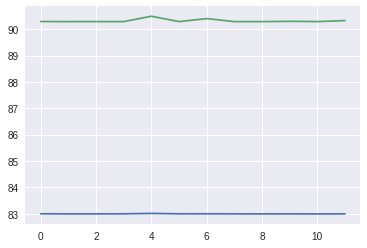

In [45]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])

dense_16
[  1.25250000e+00   7.50230000e-01   2.78810000e+00   8.88340000e-01
  -3.97790000e+00   3.79000000e+00  -4.82000000e+00  -1.24800000e+01
  -4.00000000e+00   4.57000000e+00   2.41790000e-02   9.04470000e-03
   5.08460000e-01]
[-9.2007]


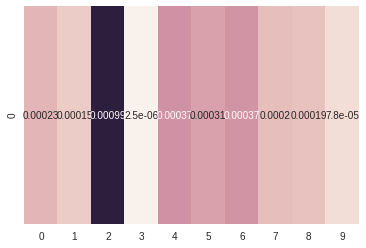

[ 1.]


In [40]:
num = 180
layer_index = 1
print(model.layers[layer_index].name)
result = model.get_layer_output([x_train[num:num+1]], layer_index)[0]
print(x_train[num])
print(y_train[num])

sns.heatmap(np.abs(result), annot=True, cbar=False)
plt.show()

result = model.predict([x_train[num:num+1]])[0]
print(result)
